In [0]:
#get the imports

import numpy as np
import os
import shutil
import skimage.io as io
from PIL import Image
import matplotlib.pyplot as plt
import zipfile


In [ ]:
#Clone the Darknet 

In [1]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 13456, done.
remote: Total 13456 (delta 0), reused 0 (delta 0), pack-reused 13456
Receiving objects: 100% (13456/13456), 11.99 MiB | 25.79 MiB/s, done.
Resolving deltas: 100% (9200/9200), done.


In [0]:
!wget http://pjreddie.com/media/files/darknet53.conv.74

In [1]:
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1' Makefile

/content/darknet
sed: -e expression #1, char 17: unterminated `s' command


In [2]:
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [3]:
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:910:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1391:14: warning: unused variable ‘buff’ [-Wunused-variable]
         char buff[100];
              ^~~~
./src/image_opencv.cpp:1367:9: warning: unused variable ‘it_tb_res’ [-Wunused-variable]
     int it_tb_res = cv::c

Helper functions for showing the images using cv2


download functions fro downloading to local machine


upload function for uploading from local machine



In [0]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [0]:
#/////////////////////////////////////////

In [0]:
#///////////////////////////////create the label files because copying it from the 

In [0]:
!mkdir images
!mkdir lab/val
!mkdir lab/train

In [0]:
shutil.copy('/content/drive/My Drive/all/YOLO/Face_detection/val_fol/imgList.txt','/content/lab/val')
shutil.copy('/content/drive/My Drive/all/YOLO/Face_detection/val_fol/Size.txt','/content/lab/val')
shutil.copy('/content/drive/My Drive/all/YOLO/Face_detection/train_fol/imgList.txt','/content/lab/train')
shutil.copy('/content/drive/My Drive/all/YOLO/Face_detection/train_fol/Size.txt','/content/lab/train')


'/content/lab/imgList.txt'

In [0]:
annotations= open('/content/drive/My Drive/all/YOLO/Face_detection/val_fol/wider_face_val_bbx_gt.txt')
lines=annotations.readlines()
numOfLines=len(lines) 
#read the Ground_truth_values

In [0]:
imgList = open('/content/lab/train/imgList.txt', 'r')
linesOfImg=imgList.readlines()
info='/content/WIDER_val/images/'
len(linesOfImg)

3180

In [0]:
imgSize = open('/content/lab/train/imgSize.txt', 'r')     #
imgSize_lines=imgSize.readlines()
i=0
j=0
r=0
while i < numOfLines:
    num_face=lines[i+1]
    #print(num_face)
    img_name = lines[i].split('/')
  
    img_name = img_name[1][:-5]
    s_s=imgSize_lines[j].split()
    imgH=float(s_s[1])
    imgW=float(s_s[0])


    for numface in range(int(num_face)):
      f=open('/content/images'+'/'+str(img_name)+'.txt','a')
      s=lines[i+2+numface].split()
      #print(s)
      #print(s[0])
      x=float(s[0])
      y=float(s[1])
      w=float(s[2])
      h=float(s[3])
      if x <= 0.0:
        x = 0.001
      if y <= 0.0:
        y = 0.001
      if w <= 0.0:
        w = 0.001
      if h <= 0.0:
        h = 0.001

      cx=x+0.5*w
      cy=y+0.5*h
      vocX=cx/imgW
      vocY=cy/imgH
      vocW=w/imgW
      vocH=h/imgH
      
      if vocX <= 0.0:
        print('x'+str(img_name))
      if vocY <= 0.0:
        print('y'+str(img_name))
      if vocW <= 0.0:
        print('w'+str(img_name))
      if vocH <= 0.0:
        print('h'+str(img_name))

    f.write('0'+' ')
    f.write(str(vocX)+' ')
    f.write(str(vocY)+' ')
    f.write(str(vocW)+' ')
    f.write(str(vocH)+' ')			
    f.write('\n')
  
    if int(num_face)==0:
      i=i+3
    else:
      i=i+int(num_face)+2

  
    print(j)
    j=j+1
    

    
 

In [0]:
#Extract the images  to currenet directory . If you have executed the staring snippets and changed the diretory to darknet then you'll find the files in data foder of darknet folder
with zipfile.ZipFile('/content/drive/My Drive/all/YOLO/Face_detection/WIDER_val.zip') as ob:
  ob.extractall()

with zipfile.ZipFile('/content/drive/My Drive/all/YOLO/Face_detection/WIDER_train.zip') as ob:
  ob.extractall()



In [0]:
base_dir='/content/WIDER_train/images/'                     #get all the images in the folder : 'images'
source_dest='/content/images'
l2=os.listdir('/content/WIDER_train/images')                
for folder in l2:
  l3=os.listdir(base_dir+folder)
  base_dir_2=base_dir+folder+'/'
  for image_1 in l3:
    shutil.move(base_dir_2+image_1, source_dest)

popo=os.listdir(source_dest)
train_image_num=len(popo)-15997
train_image_num

12881

In [0]:
base_dir='/content/WIDER_val/images/'
source_dest='/content/images'
l2=os.listdir('/content/WIDER_val/images')
for folder in l2:
  l3=os.listdir(base_dir+folder)
  base_dir_2=base_dir+folder+'/'
  for image_1 in l3:
    shutil.move(base_dir_2+image_1, source_dest)
    
popo=os.listdir(source_dest)
val_images_num=len(popo)-train_image_num
val_images_num


19223

In [0]:

shutil.copydir('/content/drive/My Drive/all/YOLO/Face_detection/train_fol/labels','/content/new_fol')
 #if you wish to jst skip al the above label gereration and simply copy the labels from the google drive execute this snippet 
 #and then using 
 #for and if else loop you can palce all the txt files from the folder to the 'images' folder  . Dont forget to do the same for validation data labels

In [8]:
#shutil.move('/content/images','/content/darknet/data')  Place the folders and  files in the desired location od darknet folder                       
shutil.copy('/content/drive/My Drive/all/YOLO/Face_detection/yolov3_custom_train.cfg','/content/darknet/cfg')
shutil.copy('/content/drive/My Drive/all/YOLO/Face_detection/train_fol/train.txt','/content/darknet/data')
shutil.copy('/content/drive/My Drive/all/YOLO/Face_detection/val_fol/val.txt','/content/darknet/data')
shutil.copy('/content/drive/My Drive/all/YOLO/Face_detection/yolo.data','/content/darknet/data')
shutil.copy('/content/drive/My Drive/all/YOLO/Face_detection/yolo.names','/content/darknet/data')

'/content/darknet/data/yolo.names'

In [11]:
!ln -s /content/drive/My\ Drive/ /mydrive_2             #the space between the My and Drive fucks up  some functionalities of yolo and is irritating thus created an aka path
!ls /mydrive_2

'2nd evaluation.gslides'  'Colab Notebooks'		        new
 all			  'Interesting keggle notebooks.gdoc'


In [0]:
!./darknet detector train '/content/darknet/data/yolo.data' '/content/darknet/cfg/yolov3_custom_train.cfg'  '/content/darknet53.conv.74' -dont_show

In [ ]:
#test results after 3000 steps.Need to train more for better accuracy

In [9]:
%cd cfg
!sed -i 's/batch=5/batch=1/' yolov3_custom_train.cfg
!sed -i 's/subdivisions=1/subdivisions=1/' yolov3_custom_train.cfg
%cd ..

/content/darknet/cfg
/content/darknet


 CUDA-version: 10010 (10010), GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 610, cudnn_half = 0, GPU: Tesla P4 
net.optimized_memory = 0 
mini_batch = 1, batch = 32, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv  

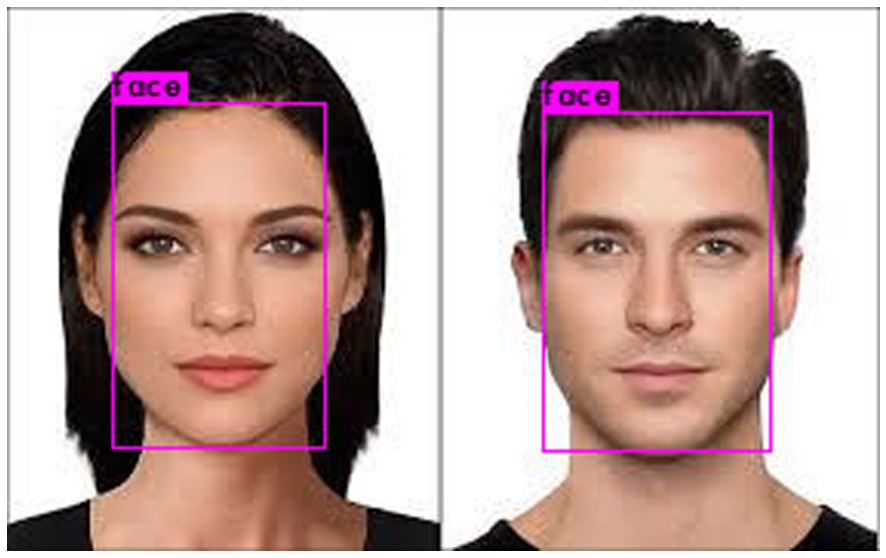

In [26]:
!./darknet detector test /content/darknet/data/yolo.data /content/darknet/cfg/yolov3_custom_train.cfg /mydrive_2/all/YOLO/Face_detection/backup/yolov3_custom_train_3000.weights /content/images.jpeg #-thresh 0.3
#check the name of the weight file in goolgle drive
imShow('predictions.jpg')